In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the data
train_data = pd.read_csv('Train_Data.csv')
train_labels = pd.read_csv('Traindata_classlabels.csv')
test_data = pd.read_csv('Test_Data.csv')

In [3]:
# Check for missing values in the training data
missing_values = train_data.isnull().sum()
print(f"Missing values in training data:\n{missing_values}\n")

Missing values in training data:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64



In [4]:
# Check the data types for each feature in the dataset
data_types = train_data.dtypes
print("\nData types of the features in the training data:")
print(data_types)


Data types of the features in the training data:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object


In [5]:
# Verify uniform distribution of class labels
label_distribution = train_labels.value_counts()
print(f"Distribution of class labels in training data:\n{label_distribution}\n")

Distribution of class labels in training data:
price_range
0              500
1              500
2              500
3              500
Name: count, dtype: int64



In [6]:
# Check that the features match the columns in the training data
features = [
    'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
    'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
    'touch_screen', 'wifi']
feature_check = all(feature in train_data.columns for feature in features)
print(f"Do the features match the columns in the training data? {feature_check}")

Do the features match the columns in the training data? True


In [7]:
# Check for binary and continuous features
binary_features = []
continuous_features = []

for column in train_data.columns:
    unique_values = train_data[column].unique()
    if len(unique_values) == 2:
        binary_features.append(column)
    else:
        continuous_features.append(column)

# Print the results
print(f"Binary features: {binary_features}")
print(f"Continuous features: {continuous_features}")

Binary features: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
Continuous features: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [8]:
# Display statistical summary of continuous features
print(train_data.describe())

       battery_power       blue  clock_speed     dual_sim           fc   
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000  \
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores   
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  \
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0

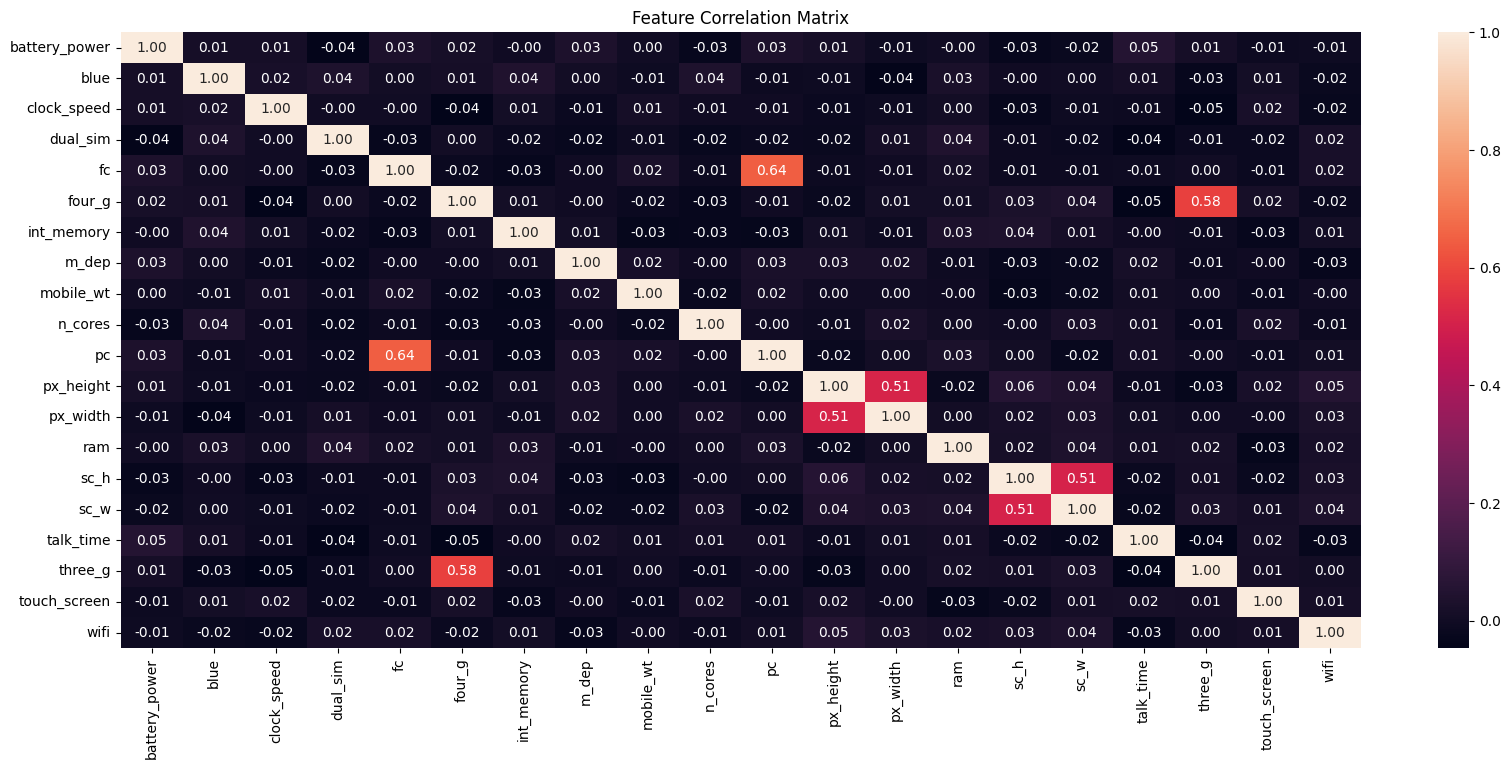

In [9]:
# Calculate and plot the correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [10]:
# Check the class balance
print(train_labels['price_range'].value_counts(normalize=True))


price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64


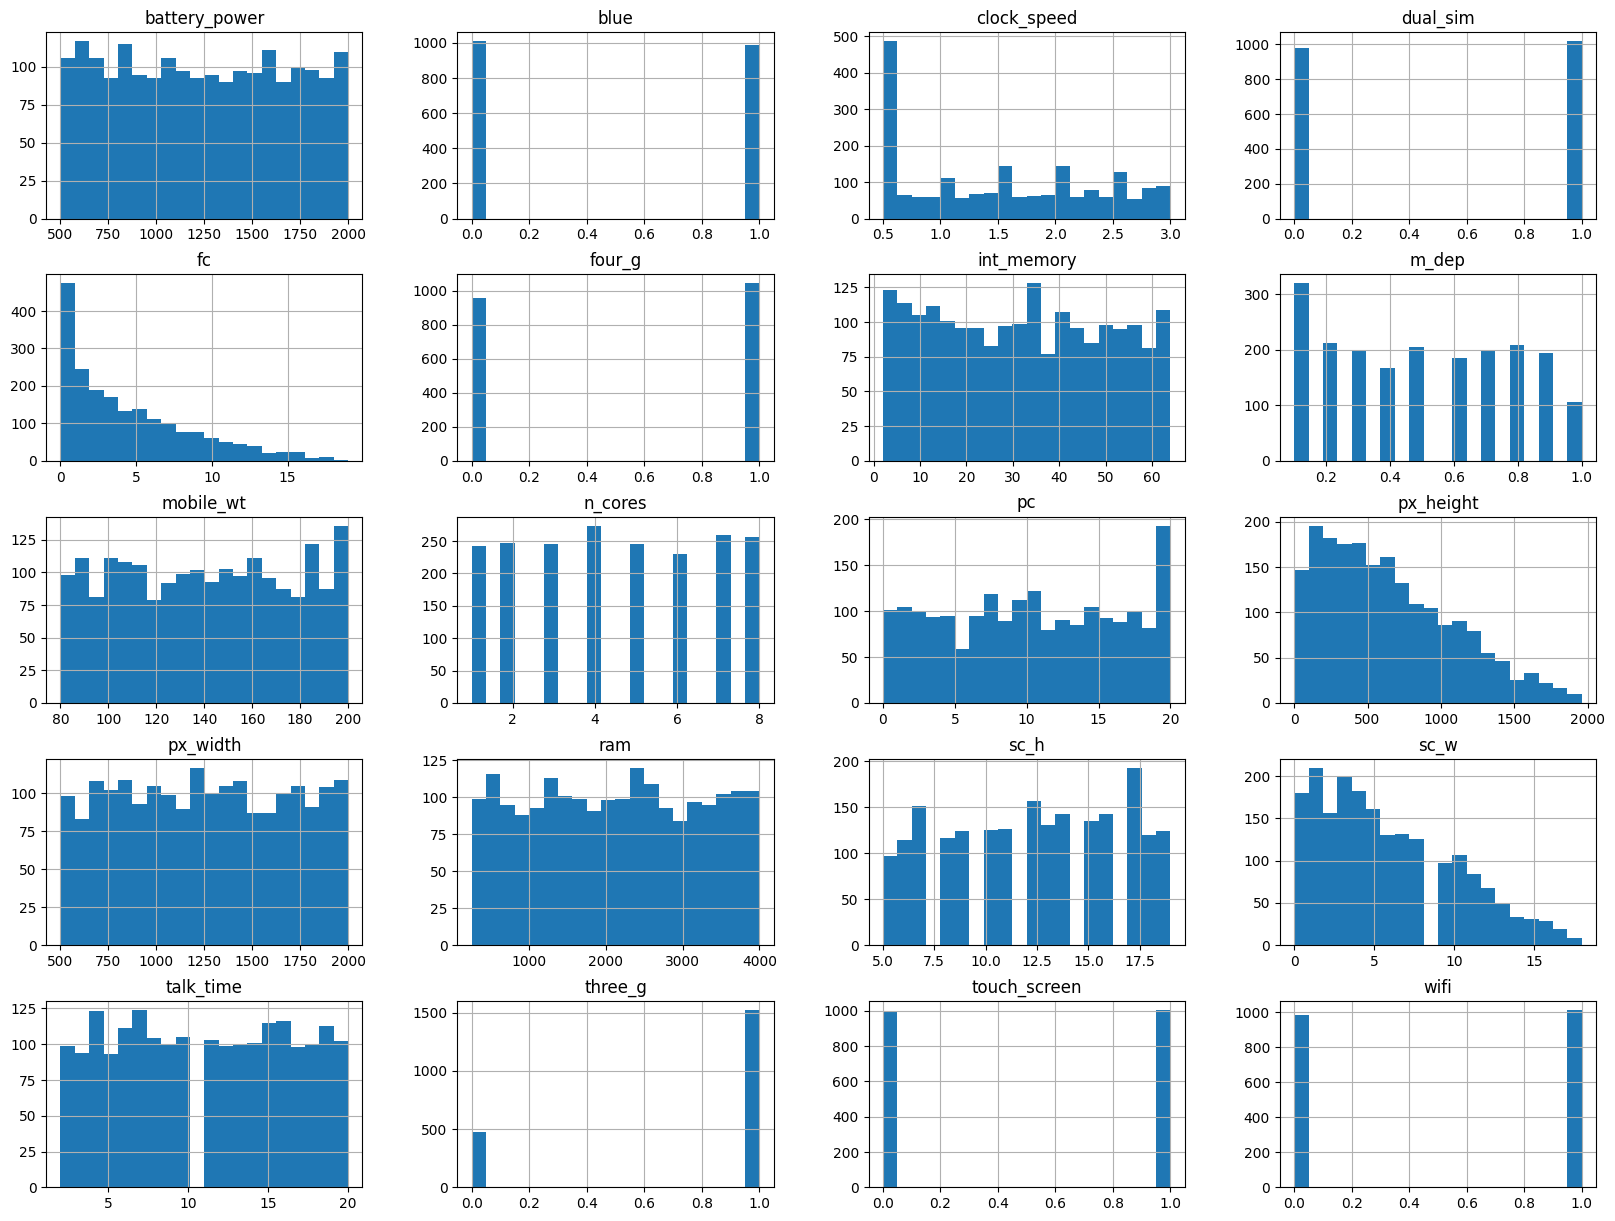

In [11]:
# Plot histograms for each continuous feature
train_data.hist(bins=20, figsize=(20, 15))
plt.show()

In [12]:
# We will use the IQR method for outlier detection

for column in train_data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)]
    print(f"{column} has {outliers.shape[0]} outliers")

battery_power has 0 outliers
blue has 0 outliers
clock_speed has 0 outliers
dual_sim has 0 outliers
fc has 18 outliers
four_g has 0 outliers
int_memory has 0 outliers
m_dep has 0 outliers
mobile_wt has 0 outliers
n_cores has 0 outliers
pc has 0 outliers
px_height has 2 outliers
px_width has 0 outliers
ram has 0 outliers
sc_h has 0 outliers
sc_w has 0 outliers
talk_time has 0 outliers
three_g has 477 outliers
touch_screen has 0 outliers
wifi has 0 outliers


In [13]:
# To check the variance of features which suggests if scaling is necessary
print(train_data.var())


battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
dtype: float64


In [14]:
# For One-Hot Encoding
one_hot_encoded_data = pd.get_dummies(train_data, columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'])


In [15]:
from sklearn.ensemble import RandomForestClassifier


# Assuming the class labels are in the first column of train_labels
y = train_labels.iloc[:, 0]

# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_data, y)

# Get feature importances
importances = rf.feature_importances_

# Print the feature importances
feature_importances = pd.DataFrame({'feature': train_data.columns, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

          feature  importance
13            ram    0.494163
0   battery_power    0.074602
12       px_width    0.057448
11      px_height    0.055640
8       mobile_wt    0.038960
6      int_memory    0.034699
16      talk_time    0.030347
15           sc_w    0.027892
10             pc    0.027459
14           sc_h    0.026547
2     clock_speed    0.026069
4              fc    0.024274
7           m_dep    0.023293
9         n_cores    0.022036
18   touch_screen    0.006620
3        dual_sim    0.006448
1            blue    0.006312
19           wifi    0.006255
5          four_g    0.006237
17        three_g    0.004702
